In [1]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import pandas_ta as ta
import seaborn as sns
import yfinance as yf

In [2]:
data = yf.download(
    "SISE.IS", period="max", interval="15m", start="2021-07-15"
)  # Start date must be within the last 60 days for 5m frequency.
data.drop(["Close"], axis=1, inplace=True)
data.rename(columns={"Adj Close": "Close"}, inplace=True)
data.index.name = "Date"
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-07-16 09:45:00+03:00,7.62,7.62,7.62,7.62,0
2021-07-16 10:00:00+03:00,7.62,7.62,7.60,7.60,1055244
2021-07-16 10:15:00+03:00,7.61,7.62,7.59,7.61,989176
2021-07-16 10:30:00+03:00,7.61,7.61,7.58,7.58,957615
2021-07-16 10:45:00+03:00,7.59,7.60,7.58,7.59,684927
...,...,...,...,...,...
2021-09-03 16:15:00+03:00,8.76,8.76,8.74,8.75,1143428
2021-09-03 16:30:00+03:00,8.74,8.75,8.74,8.74,68800
2021-09-03 16:45:00+03:00,8.75,8.75,8.73,8.75,1234985


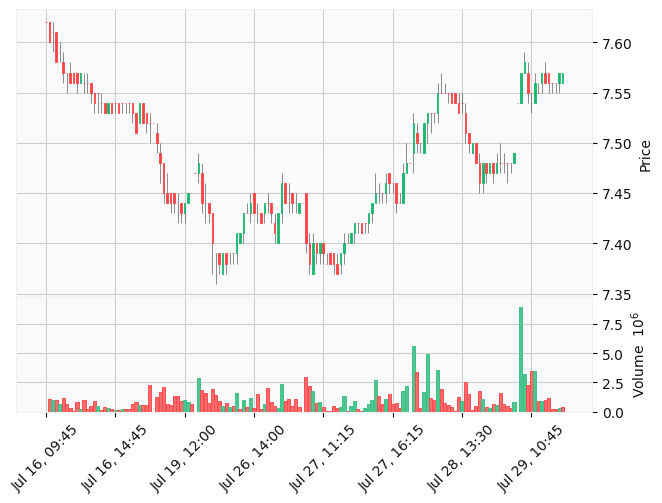

In [3]:
n = 150
mpf.plot(data.iloc[:n], volume=True, type="candle", style="yahoo")

In [4]:
# Technical indicators can be divided into four groups
# Trend
adx = data.ta.adx()
sma = data.ta.sma()
macd = data.ta.macd()

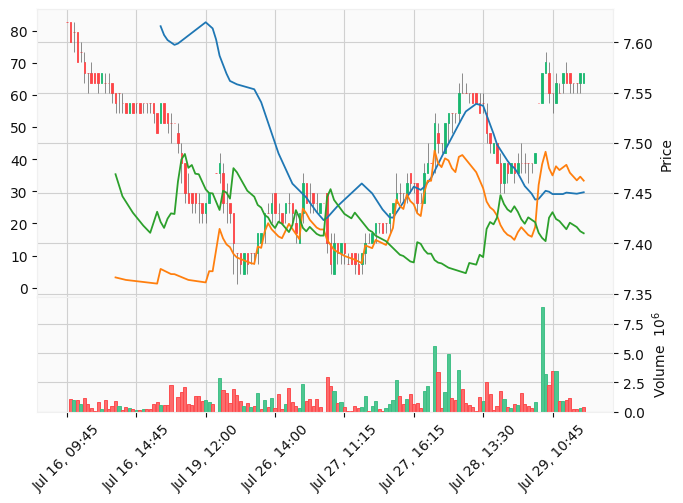

In [5]:
n = 150

mpf.plot(
    data.iloc[:n],
    volume=True,
    type="candle",
    addplot=mpf.make_addplot(adx[:n]),
    style="yahoo",
)

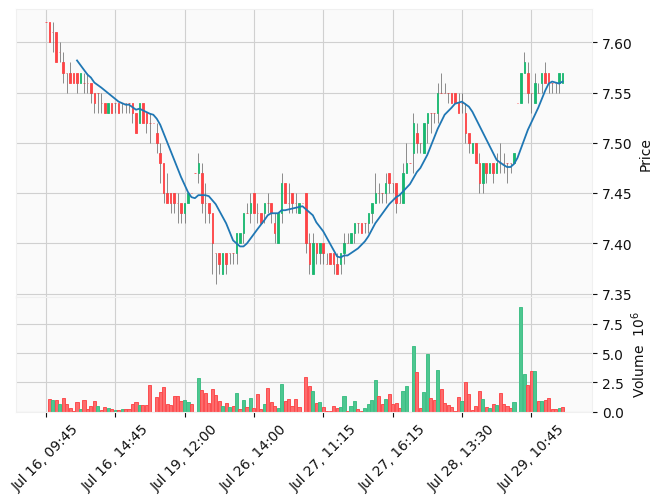

In [6]:
mpf.plot(
    data.iloc[:n],
    volume=True,
    type="candle",
    addplot=mpf.make_addplot(sma[:n]),
    style="yahoo",
)

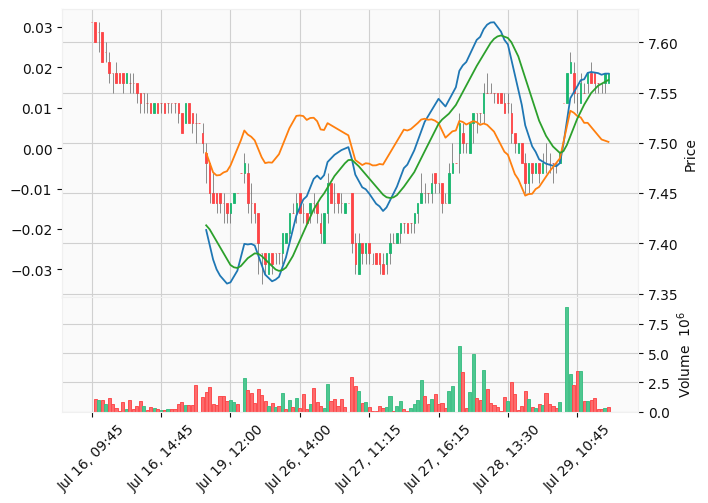

In [7]:
mpf.plot(
    data.iloc[:n],
    volume=True,
    type="candle",
    addplot=mpf.make_addplot(macd[:n]),
    style="yahoo",
)

In [8]:
# Momentum CCI, RSI, Stochastic
cci = data.ta.cci()
rsi = data.ta.rsi()
sto = data.ta.stoch()

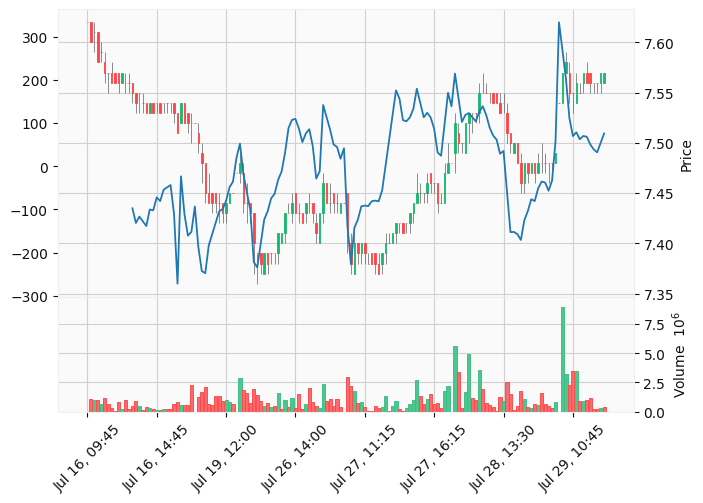

In [9]:
mpf.plot(
    data.iloc[:n],
    volume=True,
    type="candle",
    addplot=mpf.make_addplot(cci[:n]),
    style="yahoo",
)

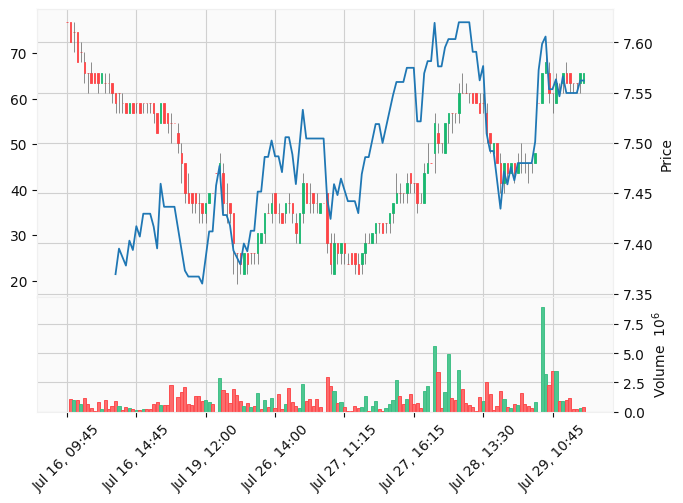

In [10]:
mpf.plot(
    data.iloc[:n],
    volume=True,
    type="candle",
    addplot=mpf.make_addplot(rsi[:n]),
    style="yahoo",
)

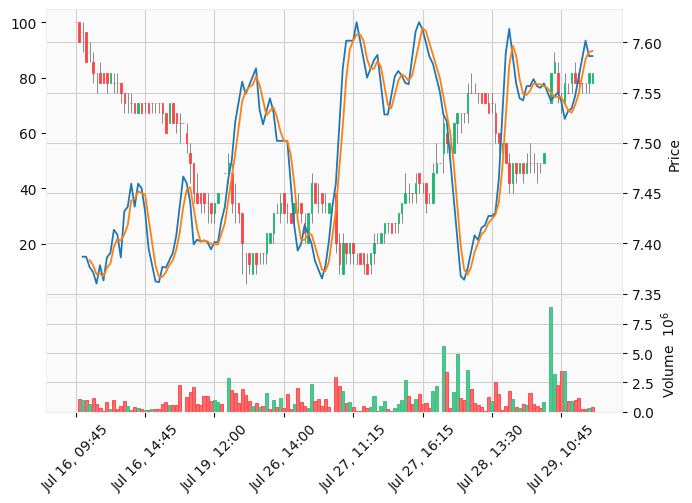

In [11]:
mpf.plot(
    data.iloc[:n],
    volume=True,
    type="candle",
    addplot=mpf.make_addplot(sto[:n]),
    style="yahoo",
)

In [12]:
# Volatility ATR, BB
atr = data.ta.atr()
bb = data.ta.bbands()

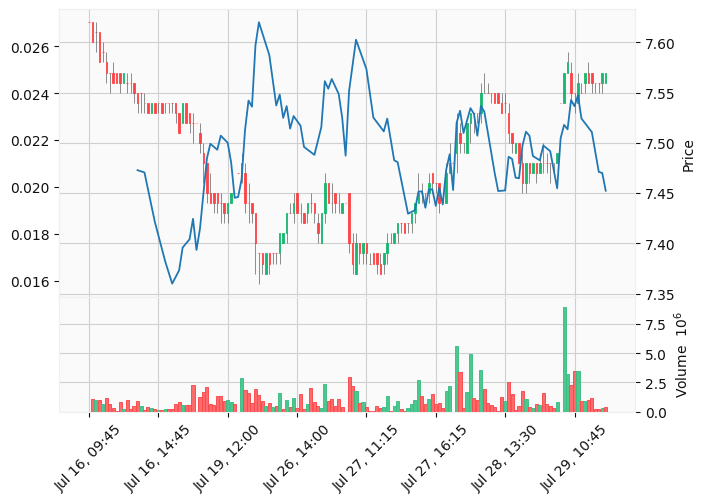

In [13]:
mpf.plot(
    data.iloc[:n],
    volume=True,
    type="candle",
    addplot=mpf.make_addplot(atr[:n]),
    style="yahoo",
)

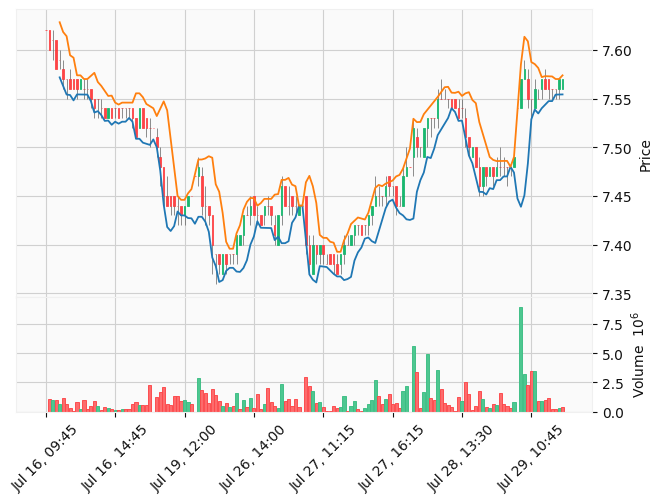

In [14]:
mpf.plot(
    data.iloc[:n],
    volume=True,
    type="candle",
    addplot=mpf.make_addplot(bb.iloc[:n, [0, 2]]),
    style="yahoo",
)

In [15]:
# Volume
obv = data.ta.obv()

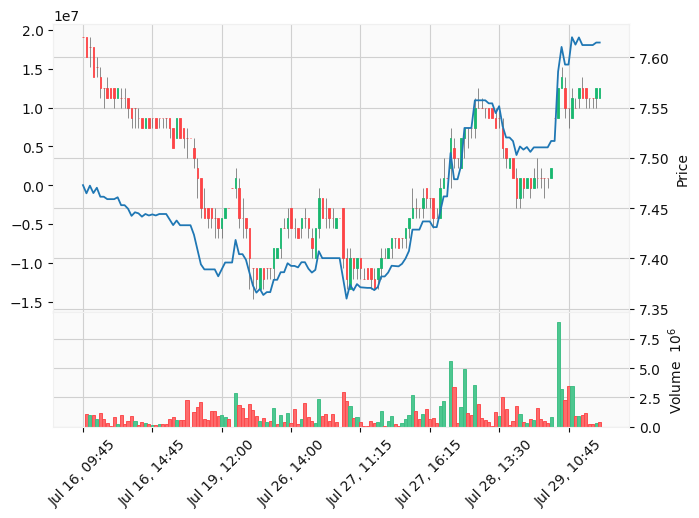

In [16]:
mpf.plot(
    data.iloc[:n],
    volume=True,
    type="candle",
    addplot=mpf.make_addplot(obv[:n]),
    style="yahoo",
)

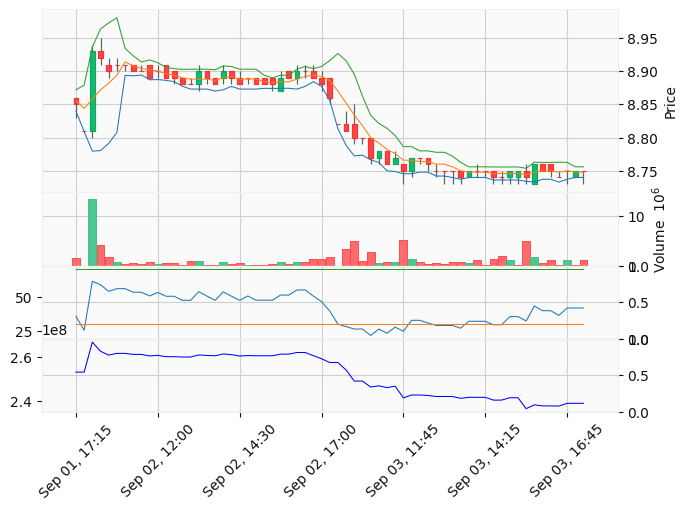

In [17]:
# Combine indicators
bb = data.ta.bbands()
rsi = data.ta.rsi()
obv = data.ta.obv()

# RSI Lines
hline0 = [30] * data.shape[0]
hline1 = [70] * data.shape[0]

n = 63

apds = [
    mpf.make_addplot(bb.iloc[-n:, [0, 1, 2]], width=0.75),
    mpf.make_addplot(rsi[-n:], panel=2, secondary_y=True, width=0.75),
    mpf.make_addplot(hline0[-n:], panel=2, secondary_y=True, width=0.75),
    mpf.make_addplot(hline1[-n:], panel=2, secondary_y=True, width=0.75),
    mpf.make_addplot(obv[-n:], panel=3, color="b",
                     secondary_y=True, width=0.75),
]

mpf.plot(
    data.iloc[-n:],
    volume=True,
    type="candle",
    style="yahoo",
    num_panels=4,
    addplot=apds,
)